In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [69]:
pcrdata = pd.read_csv('PCR_results.txt', sep='\t')
pcrdata.tail()

,Plate,Well,Confirmed
34,2,E6,0
35,2,H10,0
36,2,H8,0
37,2,A12,0
38,2,B2,0


In [3]:
pcrdata.dtypes

Plate         int64
Well         object
Confirmed     int64
dtype: object

In [70]:
# get filepaths from /global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/Corrected_Final_Config.csv
configfile_df = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/Corrected_Final_Config.csv', usecols=['R1_Filepath', 'R2_Filepath', 'Plate', 'LibraryName'])
configfile_df['Plate_number'] = configfile_df['Plate'].str[-1]
configfile_df['Plate_number'] = pd.to_numeric(configfile_df['Plate_number'])
configfile_df

,R1_Filepath,R2_Filepath,Plate,LibraryName,Plate_number
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A3,1
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1
...,...,...,...,...,...
187,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2
188,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H9,2
189,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H10,2
190,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H11,2


In [71]:
configfile_df.dtypes

R1_Filepath     object
R2_Filepath     object
Plate           object
LibraryName     object
Plate_number     int64
dtype: object

In [72]:
pcr_filepaths = pcrdata.merge(configfile_df, left_on=['Plate', 'Well'], right_on=['Plate_number', 'LibraryName'])
pcr_filepaths

,Plate_x,Well,Confirmed,R1_Filepath,R2_Filepath,Plate_y,LibraryName,Plate_number
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A9,1
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A10,1
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,B5,1
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,E1,1
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,E2,1
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,F1,1
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,F5,1
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,F6,1


In [73]:
allfiles = pcr_filepaths['R1_Filepath'].to_list() + pcr_filepaths['R2_Filepath'].to_list()
allfiles[:5]

['/global/scratch/projects/fc_wolflab/bbioinfo/230914_BacteroidesPatnodeLab_GTAC_VPL/BacteroidesPatnodePlate1_121323/LIB015015_22GMJHLT3_S95_L006_R1_001.fastq.gz',
 '/global/scratch/projects/fc_wolflab/bbioinfo/230914_BacteroidesPatnodeLab_GTAC_VPL/BacteroidesPatnodePlate1_121323/LIB015018_22GMJHLT3_S92_L006_R1_001.fastq.gz',
 '/global/scratch/projects/fc_wolflab/bbioinfo/230914_BacteroidesPatnodeLab_GTAC_VPL/BacteroidesPatnodePlate1_121323/LIB015022_22GMJHLT3_S88_L006_R1_001.fastq.gz',
 '/global/scratch/projects/fc_wolflab/bbioinfo/230914_BacteroidesPatnodeLab_GTAC_VPL/BacteroidesPatnodePlate1_121323/LIB015023_22GMJHLT3_S87_L006_R1_001.fastq.gz',
 '/global/scratch/projects/fc_wolflab/bbioinfo/230914_BacteroidesPatnodeLab_GTAC_VPL/BacteroidesPatnodePlate1_121323/LIB015030_22GMJHLT3_S80_L006_R1_001.fastq.gz']

In [74]:
# with open ('PCRtest_filepaths.txt', 'w') as f:
#     for line in allfiles:
#         f.write(f'{line}\n')

In [75]:
pcrdata['kraken_outputs'] = '/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate'+pcrdata['Plate'].astype(str) + '/' + pcrdata['Well'] + '/kraken_reports/*.k2report'
pcrdata.iloc[0,3]

'/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A2/kraken_reports/*.k2report'

In [76]:
test_kraken = glob.glob('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A2/kraken_reports/*.k2report')  #146 kB file
test_klist = []
# Check if a file was found
if test_kraken:
    # Get the first (and only) file path
    file_path = test_kraken[0]
    
    # Open and process the file
    with open(file_path, 'r') as f:
        for line in f:
            s = line.split('\t')
            s = [x.strip() for x in s]
            # print(s)
            test_klist.append(s)
else:
    print("No files found matching the pattern.")

columns = ['pct', 'count1', 'count2', 'type', 'ID', 'name']
# Convert the data list into a pandas DataFrame
test_kdf = pd.DataFrame(test_klist, columns=columns)
# test_kdf.iloc[:, :3] = test_kdf.iloc[:, :3].apply(pd.to_numeric)
test_kdf['pct'] = pd.to_numeric(test_kdf['pct'], errors='raise')
test_kdf['count1'] = pd.to_numeric(test_kdf['count1'], errors='raise')
test_kdf['count2'] = pd.to_numeric(test_kdf['count2'], errors='raise')
# Display the resulting DataFrame
test_kdf

,pct,count1,count2,type,ID,name
0,2.49,224403,224403,U,0,unclassified
1,97.51,8779209,1163,R,1,root
2,97.49,8777665,24181,R1,131567,cellular organisms
3,91.00,8193008,54437,D,2,Bacteria
4,88.15,7937104,0,D1,1783270,FCB group
...,...,...,...,...,...,...
2478,0.00,1,0,G,181086,Prymnesiovirus
2479,0.00,1,0,G1,358403,unclassified Prymnesiovirus
2480,0.00,1,1,S,251749,Phaeocystis globosa virus
2481,0.00,51,0,R1,2787854,other entries


In [77]:
test_kdf.dtypes

pct       float64
count1      int64
count2      int64
type       object
ID         object
name       object
dtype: object

In [78]:
test_totreads = test_kdf.iloc[0,1] + test_kdf.iloc[1,1]
test_totreads

9003612

In [79]:
test_contamreads = sum(test_kdf[test_kdf['pct']<50]['count2'])
test_contamreads

1767508

In [80]:
test_contamreads/test_totreads

0.19631099163313567

In [81]:
def kraken_contam_score(fpath, df=False):
    glob_search = glob.glob(fpath)  #get file name
    
    if glob_search: # Check if a file was found
        python_fpath = glob_search[0] # Get the first (and only) file path

        datalist = [] # initiate list for df
        
        # Open and process the file
        with open(python_fpath, 'r') as f:
            for line in f:
                data = line.split('\t')
                data = [x.strip() for x in data]
                datalist.append(data)

        columns = ['pct', 'clade_reads', 'taxon_reads', 'rank', 'ID', 'name']
        # Convert the data list into a pandas DataFrame
        kraken_df = pd.DataFrame(datalist, columns=columns)
        # convert percents/counts to float/int
        kraken_df['pct'] = pd.to_numeric(kraken_df['pct'], errors='raise')
        kraken_df['clade_reads'] = pd.to_numeric(kraken_df['clade_reads'], errors='raise')
        kraken_df['taxon_reads'] = pd.to_numeric(kraken_df['taxon_reads'], errors='raise')
        
        # Calculate contamination
        totreads = kraken_df.iloc[0,1] + kraken_df.iloc[1,1]
        contamreads = sum(kraken_df[kraken_df['pct']<50]['taxon_reads'])
        contam_score = contamreads/totreads

        if df:
            print(contam_score)
            return kraken_df
        else:
            return contam_score

    else:
        print("No files found matching the file pattern.")


In [82]:
kraken_contam_score('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A2/kraken_reports/*.k2report')

0.19631099163313567

In [83]:
# from /global/scratch/projects/fc_wolflab/bbioinfo/empchase/checkm_all/output_analysis-v2.ipynb
# September 18, 2024 interlude with bvbrc data
# bvbrc_dict={'A05':1.6, 'A10':0.2, 'A12':57.7, 'A11':52.6, 'G02':0.2, 'A02':0.2}
bvbrc_dict={'Well':['A5', 'A10', 'A12', 'A11', 'G2', 'A2'], 
           'bvbrc_pct_contam':[1.6, 0.2, 57.7, 52.6, 0.2, 0.2]}
bvbrc_df = pd.DataFrame.from_dict(bvbrc_dict)
bvbrc_df['Plate'] = 1
bvbrc_df

,Well,bvbrc_pct_contam,Plate
0,A5,1.6,1
1,A10,0.2,1
2,A12,57.7,1
3,A11,52.6,1
4,G2,0.2,1
5,A2,0.2,1


In [84]:
pcrdata

,Plate,Well,Confirmed,kraken_outputs
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...


In [19]:
bvbrcxkraken = bvbrc_df.merge(pcrdata, on=['Plate', 'Well'])
bvbrcxkraken

,Well,bvbrc_pct_contam,Plate,Confirmed,kraken_outputs
0,A5,1.6,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
1,A10,0.2,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
2,A12,57.7,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
3,A11,52.6,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
4,G2,0.2,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...
5,A2,0.2,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...


In [22]:
bvbrcxkraken['kraken_pct_contam'] = bvbrcxkraken['kraken_outputs'].apply(kraken_contam_score)
bvbrcxkraken

,Well,bvbrc_pct_contam,Plate,Confirmed,kraken_outputs,kraken_pct_contam
0,A5,1.6,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.169907
1,A10,0.2,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.123785
2,A12,57.7,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.461244
3,A11,52.6,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.298319
4,G2,0.2,1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.183106
5,A2,0.2,1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,0.196311


<Axes: xlabel='kraken_pct_contam', ylabel='bvbrc_pct_contam'>

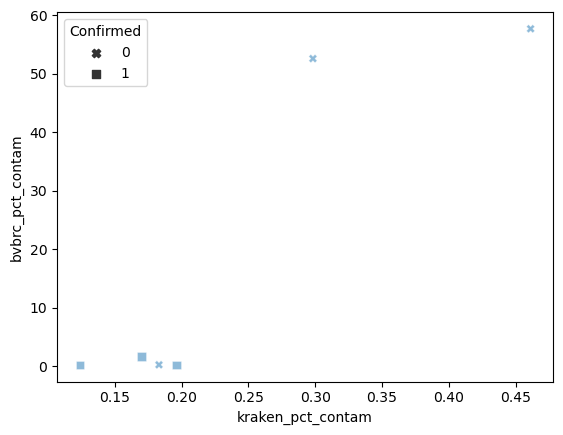

In [23]:
bool_markers = {True:'s', False:'X'}

sns.scatterplot(bvbrcxkraken, x='kraken_pct_contam', y='bvbrc_pct_contam', legend=True, style='Confirmed', markers=bool_markers, alpha=0.5)

In [24]:
correlation_spearman = bvbrcxkraken['bvbrc_pct_contam'].corr(bvbrcxkraken['kraken_pct_contam'], method='spearman')
print("Spearman correlation:", correlation_spearman)

Spearman correlation: 0.6982532518267538


In [85]:
# get kraken outputs for all data not just pcr?
configfile_df['kraken_outputs'] = '/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate'+configfile_df['Plate_number'].astype(str) + '/' + configfile_df['LibraryName'] + '/kraken_reports/*.k2report'
configfile_df

,R1_Filepath,R2_Filepath,Plate,LibraryName,Plate_number,kraken_outputs
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A3,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...
...,...,...,...,...,...,...
187,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H8,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
188,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H9,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
189,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H10,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...
190,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate2,H11,2,/global/scratch/projects/fc_wolflab/bbioinfo/s...


## Instead of calculating contamination by summing all those reads, calculate by looking at how many species level entries have significant data

In [86]:
# mostly p vulgatus, low amount of homo sapiens
test1 = kraken_contam_score('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A2/kraken_reports/*.k2report', True)
test1[(test1['rank']=='S') & (test1['pct']>3)]

0.19631099163313567


,pct,clade_reads,taxon_reads,rank,ID,name
11,61.34,5522827,5520533,S,821,Phocaeicola vulgatus
2364,6.22,559827,559827,S,9606,Homo sapiens


In [112]:
# mostly euk, followed by bac
test2 = kraken_contam_score('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A12/kraken_reports/*.k2report', True)
test2[(test2['rank']=='S') & (test2['pct']>3)]
# test2.head(15)

0.4612436301469169


,pct,clade_reads,taxon_reads,rank,ID,name
32,53.57,602261,602261,S,9606,Homo sapiens
51,7.32,82296,80929,S,371601,Bacteroides xylanisolvens
106,12.69,142657,141662,S,823,Parabacteroides distasonis


In [134]:
# mostly bac, followed by euk
test3 = kraken_contam_score('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/B1/kraken_reports/*.k2report', True)
test3[(test3['rank']=='D') & (test3['pct']>3)]
test3_1 = test3[(test3['rank']=='S') & (test3['pct']>3)]
test3_1
# if "Eukaryota" in test3_1:
#     print('euk')
# test3

0.8677522381874433


,pct,clade_reads,taxon_reads,rank,ID,name
11,42.11,58938,58905,S,821,Phocaeicola vulgatus
576,35.16,49205,49205,S,9606,Homo sapiens


In [102]:
test4 = kraken_contam_score('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/B3/kraken_reports/*.k2report', True)
test4_1 = test4[test4['name']=='Eukaryota']['pct'].iloc[0]
test4_1
# test4[(test4['rank']=='S') & (test4['pct']>3)]

0.5553943115427242


5.64

In [115]:
def kraken_genome_est(fpath, df=False):
    glob_search = glob.glob(fpath)  #get file name
    
    if glob_search: # Check if a file was found
        python_fpath = glob_search[0] # Get the first (and only) file path

        datalist = [] # initiate list for df
        
        # Open and process the file
        with open(python_fpath, 'r') as f:
            for line in f:
                data = line.split('\t')
                data = [x.strip() for x in data]
                datalist.append(data)

        columns = ['pct', 'clade_reads', 'taxon_reads', 'rank', 'ID', 'name']
        # Convert the data list into a pandas DataFrame
        kraken_df = pd.DataFrame(datalist, columns=columns)
        # convert percents/counts to float/int
        kraken_df['pct'] = pd.to_numeric(kraken_df['pct'], errors='raise')
        kraken_df['clade_reads'] = pd.to_numeric(kraken_df['clade_reads'], errors='raise')
        kraken_df['taxon_reads'] = pd.to_numeric(kraken_df['taxon_reads'], errors='raise')
        
        # Estimate number of genomes in the sample

        # Step 1: is there Eukaryotic DNA present
        domain = kraken_df[(kraken_df['rank']=='D') & (kraken_df['pct']>3)]['name'].to_list()
        #if eukaryota in list then ... throw away?
        if "Eukaryota" in domain:
            euk_contam = kraken_df[kraken_df['name']=='Eukaryota']['pct'].iloc[0]
        else:
            euk_contam = 0

        # Step 2: How many different species are represented
        species = kraken_df[(kraken_df['rank']=='S') & (kraken_df['pct']>3)]['name'].to_list()
            


        if df:
            # print(contam_score)
            return kraken_df
        else:
            return domain, euk_contam, species

    else:
        print("No files found matching the file pattern.")


In [116]:
kraken_genome_est('/global/scratch/projects/fc_wolflab/bbioinfo/sarrah/batches/trimmed_all/Plate1/A2/kraken_reports/*.k2report')

(['Bacteria', 'Eukaryota'], 6.22, ['Phocaeicola vulgatus', 'Homo sapiens'])

In [117]:
# merge pcr data with kraken , no bvbrc data # 'Domains_detect', 'Euk_reads', 'Species_detected'
pcrdata[['Domains_detect', 'Euk_reads', 'Species_detected']] = pcrdata['kraken_outputs'].apply(lambda x: pd.Series(kraken_genome_est(x)))
pcrdata

No files found matching the file pattern.


,Plate,Well,Confirmed,kraken_outputs,kraken_data,Domains_detect,Euk_reads,Species_detected
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",6.22,"[Phocaeicola vulgatus, Homo sapiens]"
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",6.57,"[Phocaeicola vulgatus, Homo sapiens]"
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",9.29,"[Phocaeicola vulgatus, Bacteroides xylanisolve..."
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola dor...","[Bacteria, Eukaryota]",8.75,"[Phocaeicola dorei, Homo sapiens]"
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",8.34,"[Phocaeicola vulgatus, Homo sapiens]"
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria], False, [Phocaeicola vulgatus])",[Bacteria],0.00,[Phocaeicola vulgatus]
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",5.86,"[Phocaeicola vulgatus, Homo sapiens]"
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",3.10,"[Phocaeicola vulgatus, Homo sapiens]"
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola dor...","[Bacteria, Eukaryota]",8.59,"[Phocaeicola dorei, Homo sapiens]"
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Parabacteroides...","[Bacteria, Eukaryota]",5.72,"[Parabacteroides distasonis, Homo sapiens]"


In [118]:
pcrdata[pcrdata['Confirmed']==1]

,Plate,Well,Confirmed,kraken_outputs,kraken_data,Domains_detect,Euk_reads,Species_detected
0,1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",6.22,"[Phocaeicola vulgatus, Homo sapiens]"
1,1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",6.57,"[Phocaeicola vulgatus, Homo sapiens]"
2,1,A9,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",9.29,"[Phocaeicola vulgatus, Bacteroides xylanisolve..."
3,1,A10,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola dor...","[Bacteria, Eukaryota]",8.75,"[Phocaeicola dorei, Homo sapiens]"
4,1,B5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",8.34,"[Phocaeicola vulgatus, Homo sapiens]"
5,1,E1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria], False, [Phocaeicola vulgatus])",[Bacteria],0.00,[Phocaeicola vulgatus]
6,1,E2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",5.86,"[Phocaeicola vulgatus, Homo sapiens]"
7,1,F1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",3.10,"[Phocaeicola vulgatus, Homo sapiens]"
8,1,F5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola dor...","[Bacteria, Eukaryota]",8.59,"[Phocaeicola dorei, Homo sapiens]"
9,1,F6,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Parabacteroides...","[Bacteria, Eukaryota]",5.72,"[Parabacteroides distasonis, Homo sapiens]"


In [119]:
pcrdata[pcrdata['Confirmed']==0]

,Plate,Well,Confirmed,kraken_outputs,kraken_data,Domains_detect,Euk_reads,Species_detected
17,1,A11,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola vul...","[Bacteria, Eukaryota]",6.71,"[Phocaeicola vulgatus, Bacteroides fragilis, H..."
18,1,A12,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Eukaryota, Bacteria], True, [Homo sapiens, B...","[Eukaryota, Bacteria]",53.57,"[Homo sapiens, Bacteroides xylanisolvens, Para..."
19,1,G2,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Phocaeicola dor...","[Bacteria, Eukaryota]",5.72,"[Phocaeicola dorei, Homo sapiens]"
20,2,G1,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides the...","[Bacteria, Eukaryota]",3.10,"[Bacteroides thetaiotaomicron, Homo sapiens]"
21,2,G2,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria], False, [Bacteroides thetaiotaomic...",[Bacteria],0.00,[Bacteroides thetaiotaomicron]
22,2,G3,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides fae...","[Bacteria, Eukaryota]",3.79,"[Bacteroides faecis, Homo sapiens]"
23,2,G4,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides ova...","[Bacteria, Eukaryota]",6.86,"[Bacteroides ovatus, Bacteroides xylanisolvens..."
24,2,G8,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides sp....","[Bacteria, Eukaryota]",3.92,"[Bacteroides sp. A1C1, Homo sapiens]"
25,2,G10,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides the...","[Bacteria, Eukaryota]",7.26,"[Bacteroides thetaiotaomicron, Homo sapiens]"
26,2,G11,0,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"([Bacteria, Eukaryota], True, [Bacteroides the...","[Bacteria, Eukaryota]",3.81,"[Bacteroides thetaiotaomicron, Homo sapiens]"


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to 

<Axes: xlabel='Euk_reads', ylabel='Count'>

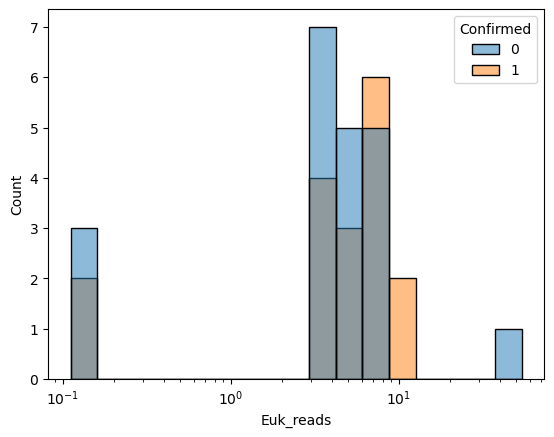

In [127]:
# pcrdata['Euk_reads'] += 0.1
sns.histplot(pcrdata, x='Euk_reads', hue='Confirmed', log_scale=True)

In [129]:
pcrdata.describe()

,Plate,Confirmed,Euk_reads
count,39.000000,39.000000,38.000000
mean,1.641026,0.435897,6.135837
std,0.485971,0.502356,8.313458
min,1.000000,0.000000,0.111100
25%,1.000000,0.000000,3.573600
50%,2.000000,0.000000,4.761100
75%,2.000000,1.000000,6.786100
max,2.000000,1.000000,53.681100


In [122]:
configfile_df[['Domains_detect', 'Euk_reads', 'Species_detected']] = configfile_df['kraken_outputs'].apply(lambda x: pd.Series(kraken_genome_est(x)))
configfile_df.head()

No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.
No files found matching the file pattern.


,R1_Filepath,R2_Filepath,Plate,LibraryName,Plate_number,kraken_outputs,Domains_detect,Euk_reads,Species_detected
0,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A1,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",4.10,"[Bacteroides cellulosilyticus, Homo sapiens]"
1,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A2,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.22,"[Phocaeicola vulgatus, Homo sapiens]"
2,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A3,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",10.65,"[Bacteroides ovatus, Homo sapiens]"
3,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A4,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",5.73,"[Bacteroides faecis, Bacteroides thetaiotaomic..."
4,/global/scratch/projects/fc_wolflab/bbioinfo/2...,/global/scratch/projects/fc_wolflab/bbioinfo/2...,Plate1,A5,1,/global/scratch/projects/fc_wolflab/bbioinfo/s...,"[Bacteria, Eukaryota]",6.57,"[Phocaeicola vulgatus, Homo sapiens]"


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Euk_reads', ylabel='Count'>

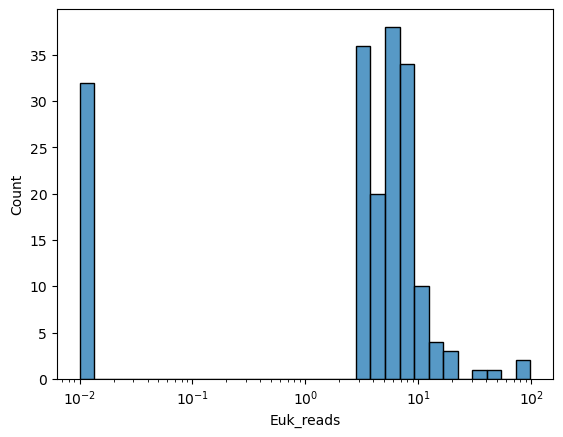

In [124]:
configfile_df['Euk_reads'] += 0.01
sns.histplot(configfile_df, x='Euk_reads',log_scale=True)

In [128]:
configfile_df.describe()

,Plate_number,Euk_reads
count,192.000000,181.000000
mean,1.500000,6.589779
std,0.501307,10.315936
min,1.000000,0.010000
25%,1.000000,3.170000
50%,1.500000,5.440000
75%,2.000000,7.420000
max,2.000000,98.650000
